## Flower Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [38]:
DATA_DIR = "flowers"
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
SEED = 42

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED
)

val_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=SEED
)

num_classes = len(train_data.class_indices)
print("Class Indices:", train_data.class_indices)
print("Num classes:", num_classes)
print("Train images:", train_data.samples, " Val images:", val_data.samples)


Found 2243 images belonging to 6 classes.
Found 560 images belonging to 6 classes.
Class Indices: {'.ipynb_checkpoints': 0, 'daisy': 1, 'dandelion': 2, 'rose': 3, 'sunflower': 4, 'tulip': 5}
Num classes: 6
Train images: 2243  Val images: 560


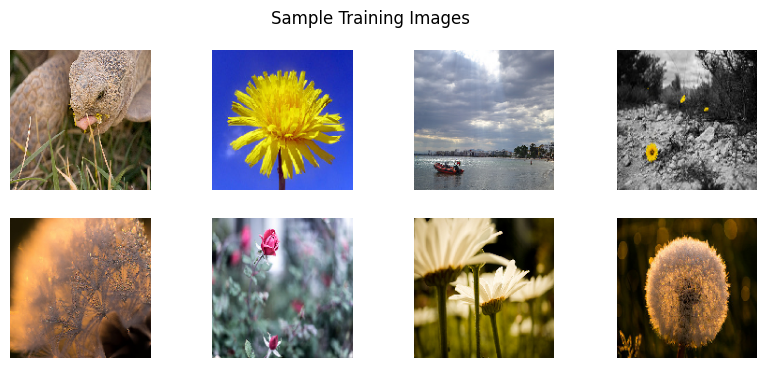

In [39]:
x_batch, y_batch = next(train_data)

plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_batch[i])
    plt.axis("off")
plt.suptitle("Sample Training Images")
plt.show()


In [24]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),

    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [25]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.3637 - loss: 1.4704 - val_accuracy: 0.5018 - val_loss: 1.1962
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.5332 - loss: 1.1582 - val_accuracy: 0.6254 - val_loss: 0.9844
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.6069 - loss: 1.0194 - val_accuracy: 0.6559 - val_loss: 0.9013
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.6685 - loss: 0.8767 - val_accuracy: 0.6577 - val_loss: 0.9065
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.7010 - loss: 0.7928 - val_accuracy: 0.6685 - val_loss: 0.8650
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.7385 - loss: 0.6935 - val_accuracy: 0.6864 - val_loss: 0.8354
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.7684 - loss: 0.6122 - val_accuracy: 0.6792 - val_loss: 0.8860
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.8072 - loss: 0.5272 - val_accuracy: 

In [ ]:
# Save trained model and class names for the Streamlit app
import json
model.save("flower_model.h5")
class_names = list(train_data.class_indices.keys())
with open("class_names.json", "w") as f:
    json.dump(class_names, f)
print("Saved model to 'flower_model.h5' and classes to 'class_names.json'")


In [27]:
from tensorflow.keras.preprocessing import image

img_path = "flowers/rose/172311368_49412f881b.jpg"  # change image path

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

class_names = list(train_data.class_indices.keys())
predicted_class = class_names[np.argmax(prediction)]

print("Predicted Flower:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Flower: rose
